In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
tbank_df = pd.read_csv('new_df.csv')
tbank_df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,realty_type,segment_cd,bundle_nm,confirmed_income,predicted_income,product_cd,functional_cd,finish_dttm,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,result_calling,product,age_group,age_difference,functional,with_pro
0,348648289,44.0,1.0,село,0.0,0.0,0.0,0.0,1.0,1.0,1.0,r_01 (6),Pro,NaN,NaN,Cash Loan,Upsell,2023-10-25 20:00:00,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN,0,Кредит,36-50,8.0,Предложения и продажи,1
1,345496995,23.0,0.0,город,0.0,0.0,1.0,0.0,1.0,0.0,0.0,t_05 (19),Без подписки,NaN,NaN,MVNO,Afterfilling,2023-06-16 07:00:00,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN,1,Другое,14-25,29.0,Другое,0
2,64946855,31.0,1.0,город,0.0,0.0,0.0,0.0,1.0,0.0,1.0,t_07 (29),Без подписки,NaN,15362.87,Cash Loan,Preapprove,2023-11-24 07:00:00,36.0,"Дозвон, Отказ",Отказ прослушать предложение,184241.0,43,W,NaN,6,RUS,UNM,0,Кредит,26-35,12.0,Предложения и продажи,0
3,516320897,34.0,0.0,город,0.0,0.0,0.0,0.0,1.0,0.0,0.0,t_10 (40),Без подписки,NaN,13233.30,Mortgage Insurance,Cold,2024-08-17 12:00:00,38.0,"Дозвон, Отказ",Страхуется в своей СК,106508.0,74,M,NaN,1,RUS,NaN,0,Страхование,26-35,40.0,Предложения и продажи,0
4,148619460,67.0,0.0,город,0.0,0.0,0.0,0.0,1.0,0.0,1.0,t_08 (30),Без подписки,NaN,NaN,Credit Cards,Preapprove,2022-07-27 14:00:00,24.0,"Дозвон, Отказ",Отказ прослушать предложение,104002.0,46,W,NaN,10,NaN,NaN,0,Кредитная карта,65+,21.0,Предложения и продажи,0


In [5]:
tbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8966 entries, 0 to 8965
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 8966 non-null   int64  
 1   age                         8944 non-null   float64
 2   gender_cd                   8933 non-null   float64
 3   region_size                 8966 non-null   object 
 4   foreign_flg                 8966 non-null   float64
 5   entrepreneur_flg            8966 non-null   float64
 6   auto_flg                    8966 non-null   float64
 7   traveler_flg                8966 non-null   float64
 8   partnership_flg             8966 non-null   float64
 9   child_amt                   8966 non-null   float64
 10  realty_type                 8966 non-null   float64
 11  segment_cd                  8966 non-null   object 
 12  bundle_nm                   8966 non-null   object 
 13  confirmed_income            903 n

Будем работать с **обработанным** датафреймом. Для начала отберем все **вещественные** признаки (они же колонки)

In [7]:
int_float_columns = [col for col in tbank_df.columns if tbank_df[col].dtype != 'object' and tbank_df[col].nunique() > 2]
for col in int_float_columns:
    print(f'{col} - {tbank_df[col].nunique()}')

customer_id - 8966
age - 67
child_amt - 7
confirmed_income - 718
predicted_income - 1876
state_talk_time_sec - 208
employee_id - 607
emp_age - 52
emp_children_cnt - 3
emp_work_months_cnt - 12
age_difference - 60


Рассмотрим только те колонки, которые могут на что-то повлиять: age, child_amt, confirmed_income, predicted_income, state_talk_time_sec, emp_age, emp_children_cnt, emp_work_months_cnt, age_difference. Мы исключаем ID пользователя и работника, так как они не несут никакой существенной информации для дальнейшего анализа

In [9]:
del_columns = ['customer_id', 'employee_id']
for col in del_columns:
    del int_float_columns[int_float_columns.index(col)]
int_float_columns

['age',
 'child_amt',
 'confirmed_income',
 'predicted_income',
 'state_talk_time_sec',
 'emp_age',
 'emp_children_cnt',
 'emp_work_months_cnt',
 'age_difference']

# Корреляция
Выведем тепловую карту корреляций

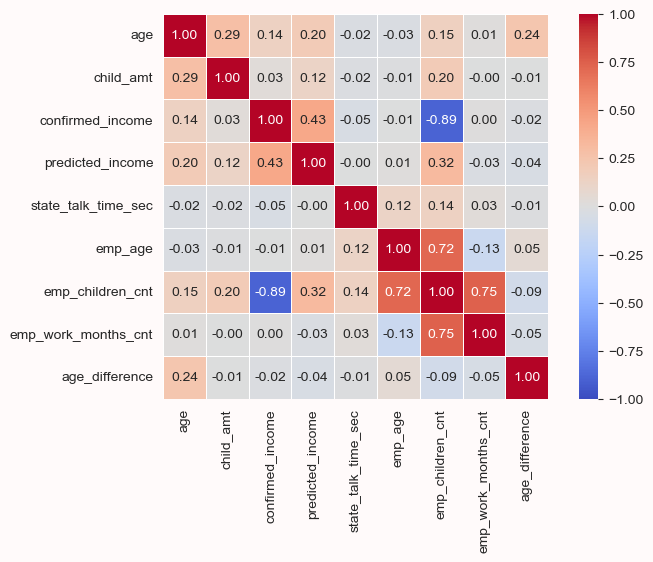

In [240]:
correlation = tbank_df[int_float_columns].corr(method='spearman')
plt.figure(figsize=(8, 5));
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True);
plt.gcf().set_facecolor('#FFFAFA');

Проведем эксперимент. Посмотрим на значение корреляции, если мы удалим столбцы с большим количеством пропусков - emp_children_cnt, confirmed_income, predicted_income

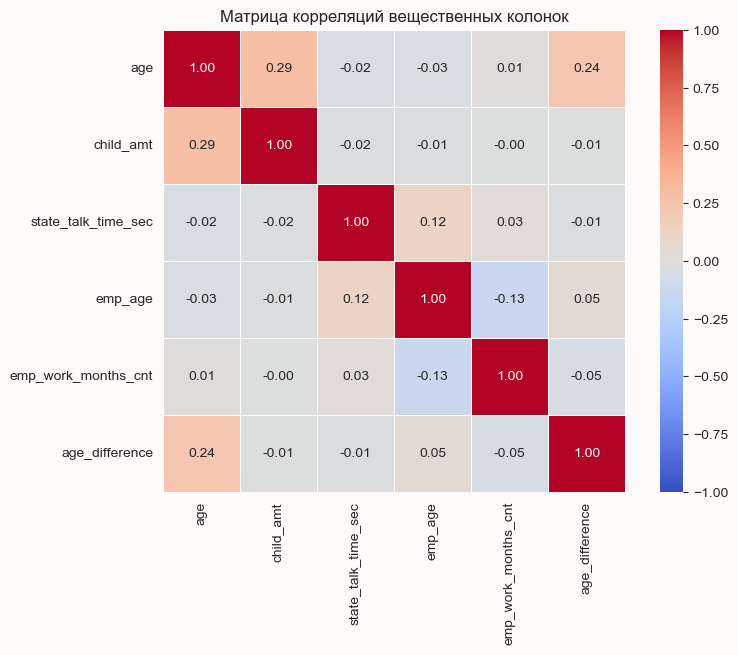

In [236]:
correlation = tbank_df[pd.Index(int_float_columns).drop(['emp_children_cnt', 'confirmed_income', 'predicted_income'])].corr(method='spearman')
plt.figure(figsize=(9, 6));
plt.title('Матрица корреляций вещественных колонок');
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True);
plt.gcf().set_facecolor('#FFFAFA');


Заметим, что после удаления признаков с большим количеством пропусков, значение корреляции не меняется, значит нет смысла их удалять. Для выводов используем первую тепловую карту корреляций

**Выводы** - (По первой тепловой карте)
- Видим довольно немаленькую линейную зависимость между количеством детей оператора и его возрастом (логично), количеством детей и временем работы в комапнии (не очевидно и не совсем логично), количеством детей и доходом (логично)
- Так же можем предположить, что чем дольше работает сотрудник, тем дольше может длится разговор

# Распределение

Посмотрим долю каждого продукта, по поводу которого звонили. Какой продукт какую долю занимает - представлено ниже

In [34]:
tbank_df['bundle_nm'].value_counts(normalize=True)

bundle_nm
Без подписки    0.657038
Pro             0.342962
Name: proportion, dtype: float64

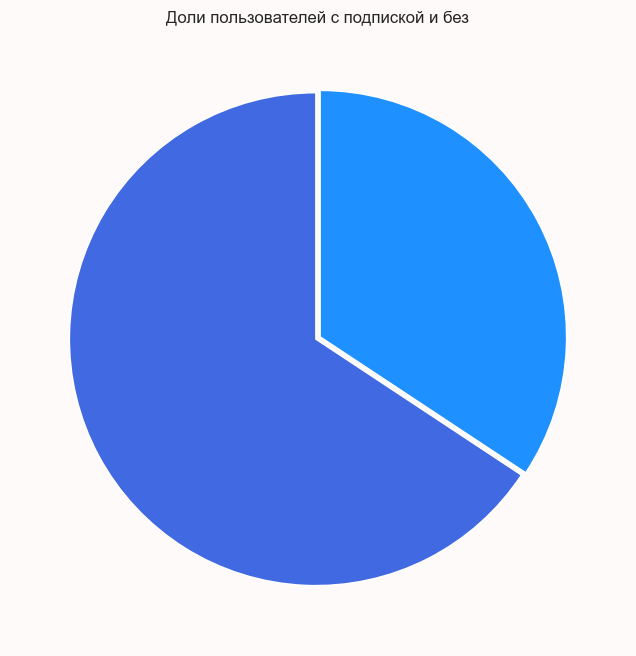

In [216]:
colors = ['#4169E1', '#1E90FF']
sub = tbank_df['bundle_nm'].value_counts(normalize=True)
groups = tbank_df['bundle_nm'].unique()
explode = [0.01] * len(sub)
plt.figure(figsize=(8, 8));
plt.pie(sub, labels=None, startangle=90, colors=colors, radius=1, explode=explode)
plt.title('Доли пользователей с подпиской и без')
plt.gcf().set_facecolor('#FFFAFA')

- **Светло-синий** - это доля с подпиской Про. Напомню, что в обраюотанном датафрейме нет клиентов с подпиской Премиум
- **Темно-синий** - доля клиентов без подписки

Далее можем посмотреть на распределение клиентов по возрасту, ну и мужчин и женщин

Text(0.5, 1.0, 'Распределение возраста')

<Figure size 640x480 with 0 Axes>

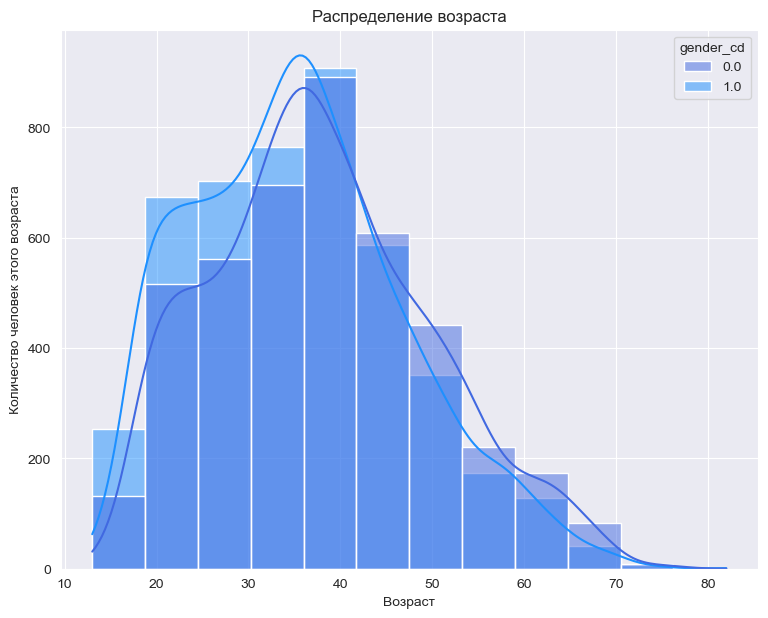

In [220]:
sns.set_style('darkgrid');
plt.gcf().set_facecolor('#FFFAFA');
plt.figure(figsize=(9, 7));
sns.histplot(data=tbank_df, x='age', bins=12, hue='gender_cd', kde=True, palette=colors);
plt.xlabel('Возраст');
plt.ylabel('Количество человек этого возраста');
plt.title('Распределение возраста')

Видим, что основная когорта клиентов - это 30-40 лет

Text(0.5, 1.0, 'Длительность разговора после удаления выбросов')

<Figure size 640x480 with 0 Axes>

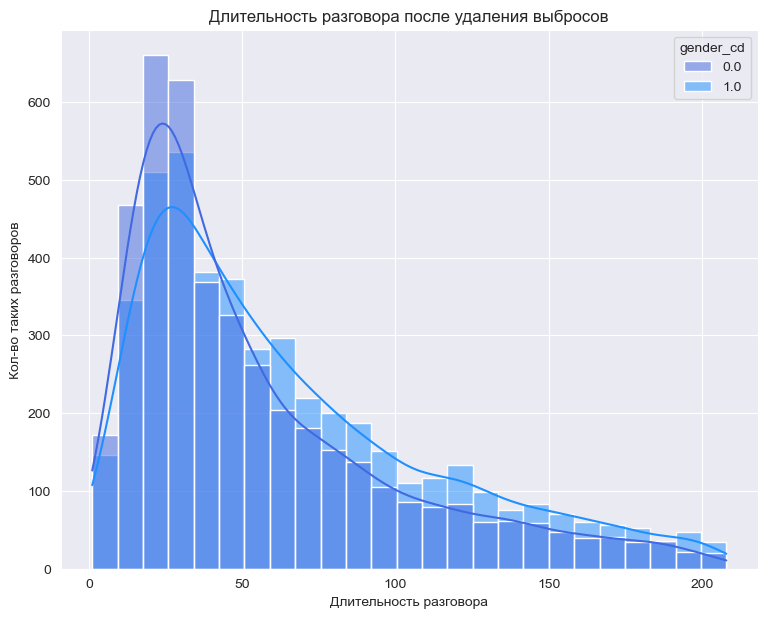

In [226]:
sns.set_style('darkgrid');
plt.gcf().set_facecolor('#FFFAFA');
plt.figure(figsize=(9, 7));
sns.histplot(data=tbank_df, x='state_talk_time_sec', kde=True, bins=25, palette=colors, legend=True, hue='gender_cd');
plt.xlabel('Длительность разговора');
plt.ylabel('Кол-во таких разговоров');
plt.title('Длительность разговора после удаления выбросов')

Так как у нас убраны выбросы, график будет именно таким, как сверху, без аномальных значений

Графики неплохие, будут в презентации, надо подумать, что еще можно добавить

Добавим боксплот по времени разговора до чистки выбросов и после нее

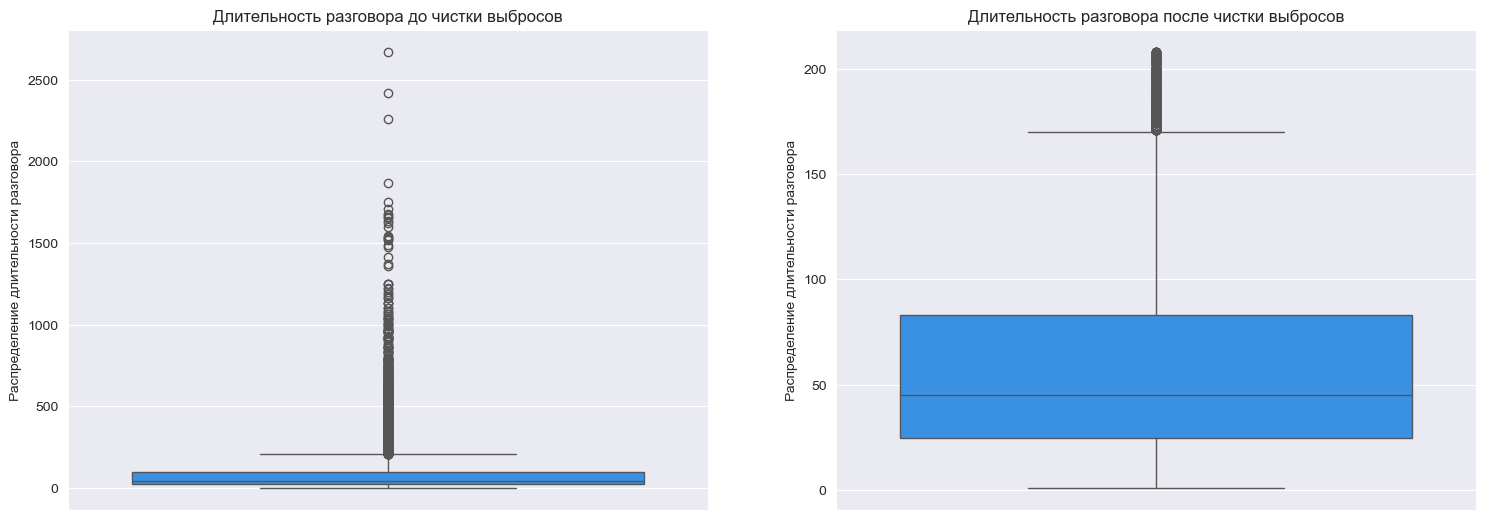

In [214]:
tbank_df_start = pd.read_csv('sale_tasks_dataset.csv')
fig = plt.figure();
sns.set_style('darkgrid');
axes1 = fig.add_axes([0,0,1,1]);
sns.boxplot(data=tbank_df_start, y='state_talk_time_sec', color='#1E90FF');
plt.ylabel('Распределение длительности разговора');
plt.title('Длительность разговора до чистки выбросов');
axes2 = fig.add_axes([1.2, 0, 1, 1]);
sns.boxplot(data=tbank_df, y='state_talk_time_sec', color='#1E90FF');
plt.title('Длительность разговора после чистки выбросов');
plt.ylabel('Распределение длительности разговора');

Text(0.5, 1.0, 'Длительность разговора до удаления выбросов')

<Figure size 640x480 with 0 Axes>

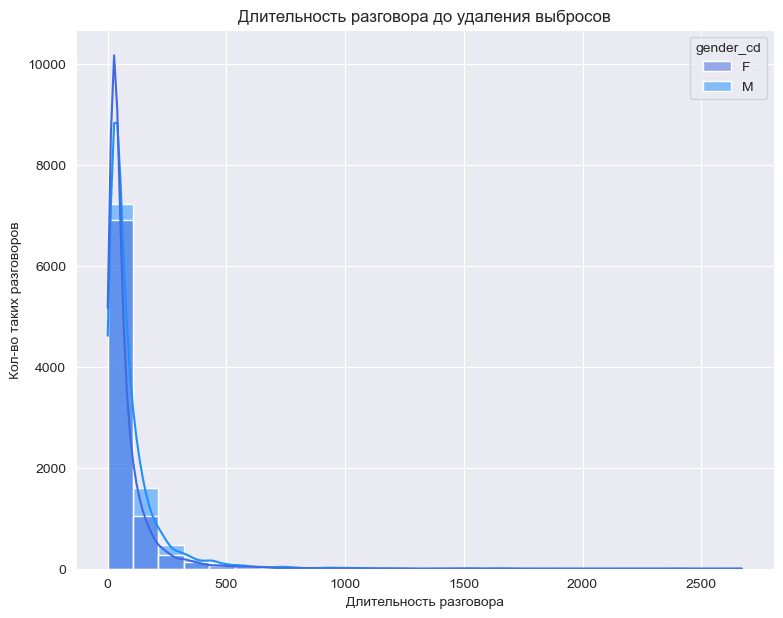

In [228]:
sns.set_style('darkgrid');
plt.gcf().set_facecolor('#FFFAFA');
plt.figure(figsize=(9, 7));
sns.histplot(data=tbank_df_start, x='state_talk_time_sec', kde=True, bins=25, palette=colors, legend=True, hue='gender_cd');
plt.xlabel('Длительность разговора');
plt.ylabel('Кол-во таких разговоров');
plt.title('Длительность разговора до удаления выбросов')